<a href="https://colab.research.google.com/github/ryanbrito/Clustering-De-Centros-de-Distribui-o---PBL-FIAP-Fase-6---2025/blob/main/GPT_PBL_TSCO_2o_Ano_Fase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Data Exploration
* Load Dataset
* Explore

In [74]:
df = pd.read_csv("Fiap On - Fase 6 - Geolocalização Dataset - Asset.csv")
df.head()

,latitude,longitude,price
0,"-21,591360","-51,066690","52,47"
1,"-21,285350","-49,654970","37,03"
2,"-22,025900","-47,067020","71,50"
3,"-21,916230","-46,686660","88,27"
4,"-22,476390","-46,632780","36,16"


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   653 non-null    object
 1   longitude  653 non-null    object
 2   price      653 non-null    object
dtypes: object(3)
memory usage: 15.4+ KB


In [76]:
df.describe()

,latitude,longitude,price
count,653,653,653
unique,648,651,638
top,"-24,005830","-46,791670","15,54"
freq,2,2,2


## Data Treatment

* Converter colunas para float
* Substituir vírgula por ponto e converte para float

In [77]:
df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)
df['price'] = df['price'].str.replace(',', '.').astype(float)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   653 non-null    float64
 1   longitude  653 non-null    float64
 2   price      653 non-null    float64
dtypes: float64(3)
memory usage: 15.4 KB


## Clustering:

1. Determinar número de clusters ideais através do **Método Cotovelo**

In [79]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['latitude', 'longitude']])

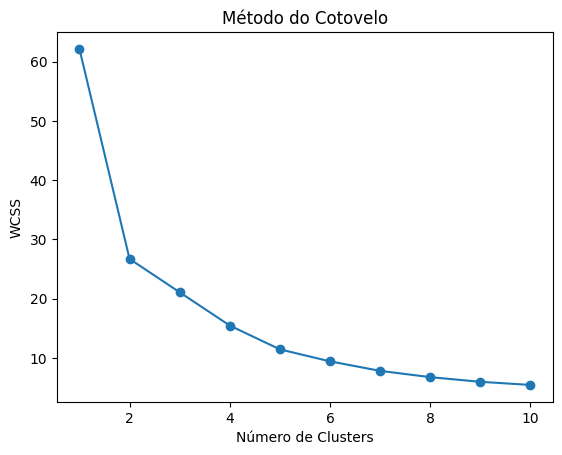

In [80]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

2. Executar o Modelo final, realizando o Clustering com K-Means.

In [110]:
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=20,  # O K-Means roda o algoritmo várias vezes com centros iniciais diferentes, para evitar cair em mínimos locais.
    max_iter=1000
)

df['cluster'] = kmeans.fit_predict(df_scaled)


 *“Testamos diferentes valores de k (de 2 a 8) e observamos, pelo método do cotovelo, que o valor k=4 apresentou o melhor equilíbrio entre simplicidade do modelo e separação dos grupos. Assim, concluímos que quatro centros de distribuição atenderiam bem às regiões analisadas.”*

## Calculo do valor total por Cluster (CD)

In [111]:
df.groupby('cluster')['price'].sum().sort_values(ascending=False)

,price
cluster,
1,14723.55
2,9046.46
3,8953.47
0,8460.33


In [112]:
print("Resumo:")
resumo = df.groupby('cluster')['price'].agg(['count', 'sum', 'mean'])
display(resumo)

Resumo:


,count,sum,mean
cluster,,,
0,129,8460.33,65.583953
1,233,14723.55,63.191202
2,147,9046.46,61.540544
3,144,8953.47,62.176875


## Visualização dos Clusters

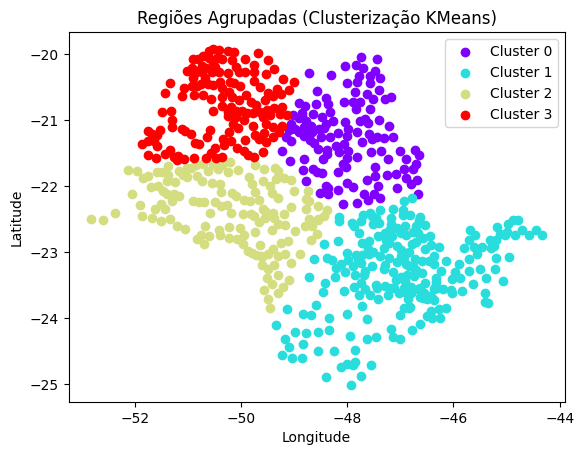

In [113]:
clusters = np.unique(df['cluster'])
colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))

# Plot each cluster separately so we can add labels
for cluster, color in zip(clusters, colors):
    plt.scatter(
        df.loc[df['cluster'] == cluster, 'longitude'],
        df.loc[df['cluster'] == cluster, 'latitude'],
        color=color,
        label=f'Cluster {cluster}'
    )

plt.title('Regiões Agrupadas (Clusterização KMeans)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Por que K-Means?

* O algoritmo K-Means foi escolhido por ser uma das técnicas mais consolidadas e eficientes para agrupamento de dados numéricos contínuos, como coordenadas geográficas (latitude e longitude).

* Sua **simplicidade e interpretabilidade** tornam-no especialmente adequado para problemas de segmentação espacial, em que cada grupo (cluster) pode ser interpretado como uma região ideal para instalação de um centro de distribuição.

* Apresenta bom desempenho computacional mesmo em bases com grande volume de dados, o que o torna amplamente utilizado em aplicações práticas de logística, marketing e análise territorial.

* Conforme destacado por Jain (2010) em “Data clustering: 50 years beyond K-means”, o algoritmo permanece como referência por equilibrar eficiência, facilidade de implementação e clareza na interpretação dos resultados — características ideais para o contexto desta análise.

# Conclusão
O modelo de clusterização foi capaz de identificar quatro regiões distintas com alto potencial para implantação de centros de distribuição. Essa divisão permite otimizar a logística e reduzir custos com falhas de entrega. A análise demonstrou que técnicas de Machine Learning podem gerar insights estratégicos para o negócio.
